In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2



In [3]:
image = cv2.imread('images/pizza_bluescreen.jpg')


In [5]:
print("This image is: ", type(image), "with dimension: ", image.shape)

This image is:  <class 'numpy.ndarray'> with dimension:  (514, 816, 3)


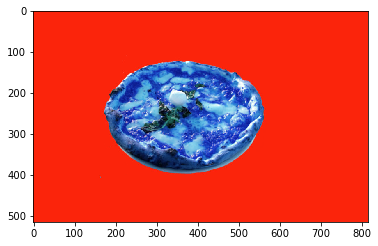

In [7]:
# Height = 514, width = 816
# Now we will show the image using the plt function
# Important point this picture is in the BGR format as opencv will read color images in BGR format not RGB
# But on the other hand matplotlib.image.imread()--> reads in RGB format
plt.imshow(image)

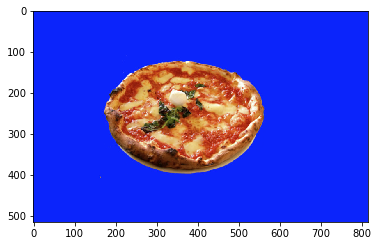

In [8]:
image_copy = np.copy(image) # used to create the copy of the image

# From BGR to RGB
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

# COLOR THRESHOLD 

In [9]:
# Define our color selection boundaries in the RGB values

lower_value = np.array([0,0,230])
upper_value = np.array([50,50,255])

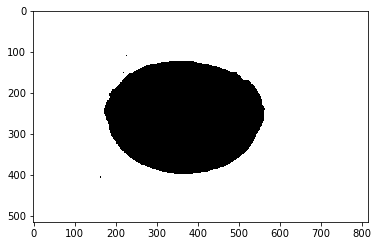

In [12]:
mask = cv2.inRange(image_copy, lower_value, upper_value)

# white is the blue area and black is where no blue is present
plt.imshow(mask, cmap='gray')

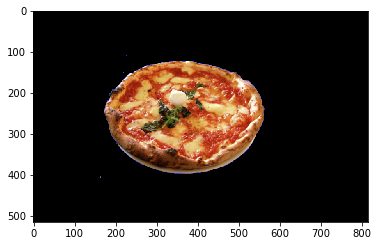

In [15]:
masked_image = np.copy(image_copy)

# mask the image to let the pizza show through
# Now we need to select the area where blue is present
# One way of doing this is as follows

masked_image [mask !=0] = [0, 0 ,0] # We have set the blue area into the black one

plt.imshow(masked_image)

# Mask and Add a background image 

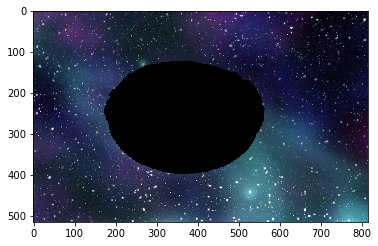

In [17]:
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

#crop it to the right size(as per the input image)
crop_background = background_image[0:514, 0:816]

# Mask the cropped background so that pizza area is blocked
crop_background [mask == 0] = [0,0,0]

plt.imshow(crop_background)

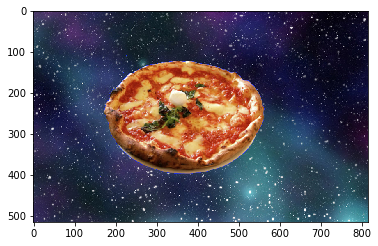

In [18]:
complete_image = crop_background + masked_image

plt.imshow(complete_image)